https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

`transforms.ToTensor()` — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1.  

`transforms.Normalize()` — normalizes the tensor with a mean and standard deviation


In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

We download the datasets, shuffle them and transform each of them. We download the data sets and load them to `DataLoader`.  
The `DataLoader`prepares your data for training.  
The `batch_size` is the number of training examples utilized in one iteration.  

In [3]:
trainset = datasets.MNIST('data/train', download=True, train=True, transform=transform)
valset = datasets.MNIST('data/test', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Checking our dataset properties

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


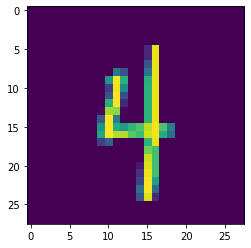

In [6]:
plt.imshow(images[0].numpy().squeeze())

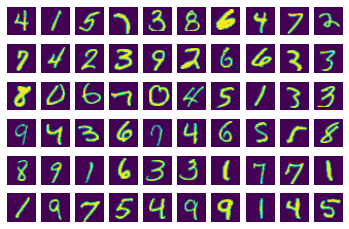

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze())

Now, we begin creating the CNN model.

In [7]:
'''
STEP 3: CREATE MODEL CLASS
'''
batch_size = 64
# n_iters = 3000
num_epochs = 7
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()

        # Average pool 1
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()

        # Average pool 2
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10) 

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Average pool 1
        out = self.avgpool1(out)

        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2 
        out = self.avgpool2(out)

        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''

model = CNNModel()

In [8]:
model

CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (avgpool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (avgpool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)

In [9]:

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Load images as tensors with gradient accumulation abilities
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in valloader:
                # Load images to tensors with gradient accumulation abilities
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {} || Accuracy: {}'.format(iter, accuracy))

/home/akash/.virtualenvs/datascience/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Iteration: 500 || Accuracy: 87.75
Iteration: 1000 || Accuracy: 91.30999755859375
Iteration: 1500 || Accuracy: 92.05999755859375
Iteration: 2000 || Accuracy: 93.23999786376953
Iteration: 2500 || Accuracy: 94.33999633789062
Iteration: 3000 || Accuracy: 94.8499984741211
Iteration: 3500 || Accuracy: 95.47000122070312
Iteration: 4000 || Accuracy: 96.0199966430664
Iteration: 4500 || Accuracy: 96.33999633789062
Iteration: 5000 || Accuracy: 96.63999938964844
Iteration: 5500 || Accuracy: 96.37000274658203
Iteration: 6000 || Accuracy: 96.91000366210938
Iteration: 6500 || Accuracy: 97.13999938964844


We define the negative log-likelihood loss

The predicted number is = tensor(0)


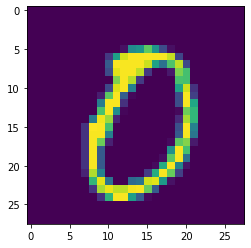

In [65]:
for i, (images, labels) in enumerate(valloader):
    images = images.requires_grad_()
    outputs = model(images)
image_index = 1
plt.imshow(images[image_index].detach().numpy().squeeze())
print("The predicted number is = "+ str(torch.argmax(model(images)[image_index])))

In [63]:
torch.save(model, './my_mnist_cnn_model.pt') 